# playing cartpole

## imports

In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
import gym 
from gym import wrappers

## varibles

In [2]:
actions = [0,1]
qtable = pd.DataFrame(columns = actions, dtype = np.float64)


## functions

In [3]:
def init_state(action, alpha = 0.09, gamma = 0.9, epsi = 0.1):
    act = action
    alph = alpha
    game = gamma
    eps = epsi
    return act, alph, game, eps


def take_act(observation,actions, alpha ,epsi, gamma = 1 ):
    global qtable
    if not (observation in qtable.index):
        temp = pd.Series([0]*len(actions), index = actions, name = observation)
        qtable = qtable.append(temp)
        
    num = np.random.uniform()
    if num>epsi :
        temp2 = qtable.loc[observation, : ]
        temp2 = temp2.reindex(np.random.permutation(temp2.index))
        action1 = temp2.idxmax()
    else :
        action1 = np.random.choice(actions)
    #print("hello", action1)
    
    
    return action1


def qlearn(observation, observation2, reward, act, actions, alpha, epsi, gamma =1):
    global qtable
    if not (observation2 in qtable.index):
        temp = pd.Series([0]*len(actions), index = actions, name = observation2)
        qtable = qtable.append(temp)
    
    q1 = qtable.loc[observation,act]
    q2 = qtable.loc[observation2,:].max()
    q1 = q1 + alpha*(reward + gamma*q2 - q1)
    qtable.loc[observation, act] = q1


def discretize(obs, env):
    bucket = [1,1,6,12]
    upper_bound = env.observation_space.high
    lower_bound = env.observation_space.low
    upper_bound[1] = 0.5
    lower_bound[1] = -0.5
    upper_bound[3] = math.radians(50)
    lower_bound[3] = -math.radians(50)
    newobs = []
    for i in range(len(upper_bound)):
        ratio = (obs[i] + abs(lower_bound[i]))/(upper_bound[i] - lower_bound[i])
        temp = int(round( (bucket[i]-1)*ratio ))
        temp = min(bucket[i]-1, max(0, temp))
        newobs.append(temp)
    
    return np.array(newobs)


def modify_epsilon(epsi):
    t = 1-math.log10((epsi+1)/25)
    return max(0.1, min(1, t))

def modify_alpha(alpha):
    t = 1-math.log10((alpha+1)/25)
    return max(0.1, min(1, t))

## vars

In [4]:
env = gym.make('CartPole-v1')
alpha = 0.09
gamma = 1
epsi = 0.1
x1 = []
y1 = []

## reinforcement learning loop

In [5]:
for i in range(210):
    observation1 = env.reset()
    observation1 = discretize(observation1, env)
    j=0
    y1.append(i)
    epsi = modify_epsilon(i)
    alpha = modify_alpha(i)
    while True:
        j+=1
        env.render()
        act1 = take_act(str(observation1),actions, alpha, epsi , gamma)
        observation2, reward, done, info = env.step(act1)
        observation2 = discretize(observation2, env)
        qlearn(str(observation1), str(observation2), reward, act1, actions, alpha, epsi , gamma)
        observation1 = observation2
        if done:
            print("Episode number : ", i, "Iteration", j)
            x1.append(j)
            break
    if j >= 500:
        break


Episode number :  0 Iteration 24
Episode number :  1 Iteration 10
Episode number :  2 Iteration 22
Episode number :  3 Iteration 13
Episode number :  4 Iteration 14
Episode number :  5 Iteration 23
Episode number :  6 Iteration 21
Episode number :  7 Iteration 26
Episode number :  8 Iteration 9
Episode number :  9 Iteration 28
Episode number :  10 Iteration 26
Episode number :  11 Iteration 16
Episode number :  12 Iteration 14
Episode number :  13 Iteration 13
Episode number :  14 Iteration 12
Episode number :  15 Iteration 23
Episode number :  16 Iteration 19
Episode number :  17 Iteration 15
Episode number :  18 Iteration 20
Episode number :  19 Iteration 11
Episode number :  20 Iteration 31
Episode number :  21 Iteration 34
Episode number :  22 Iteration 21
Episode number :  23 Iteration 37
Episode number :  24 Iteration 73
Episode number :  25 Iteration 9
Episode number :  26 Iteration 20
Episode number :  27 Iteration 25
Episode number :  28 Iteration 10
Episode number :  29 Itera

## show how learning went on

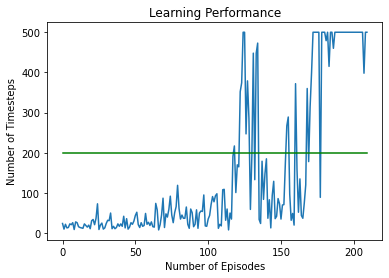

In [6]:
x1 = np.array(x1)
y1 = np.array(y1)
plt.plot(y1,x1)

z2 = [200]*210
z1 = []
for i in range(0,210):
    z1.append(i)
z1 = np.array(z1)
z2 = np.array(z2)
plt.plot(z1, z2, color = 'green')

plt.title("Learning Performance")
plt.xlabel("Number of Episodes")
plt.ylabel("Number of Timesteps")
plt.show()